In [2]:
import intern.utils.parallel as intern 

In [5]:
blocks = intern.block_compute(0, 5, 0, 5, 0, 5, (0, 0, 0), (50, 50, 50))

In [7]:
import numpy as np
print(blocks)

[((0, 5), (0, 5), (0, 5))]


In [8]:
intern.block_compute(0, 1000, 0, 1000, 0, 1000, (0, 0, 0), (50, 50, 50))

[((50, 100), (50, 100), (50, 100)),
 ((50, 100), (50, 100), (100, 150)),
 ((50, 100), (50, 100), (150, 200)),
 ((50, 100), (50, 100), (200, 250)),
 ((50, 100), (50, 100), (250, 300)),
 ((50, 100), (50, 100), (300, 350)),
 ((50, 100), (50, 100), (350, 400)),
 ((50, 100), (50, 100), (400, 450)),
 ((50, 100), (50, 100), (450, 500)),
 ((50, 100), (50, 100), (500, 550)),
 ((50, 100), (50, 100), (550, 600)),
 ((50, 100), (50, 100), (600, 650)),
 ((50, 100), (50, 100), (650, 700)),
 ((50, 100), (50, 100), (700, 750)),
 ((50, 100), (50, 100), (750, 800)),
 ((50, 100), (50, 100), (800, 850)),
 ((50, 100), (50, 100), (850, 900)),
 ((50, 100), (50, 100), (900, 950)),
 ((50, 100), (50, 100), (0, 50)),
 ((50, 100), (50, 100), (950, 1000)),
 ((50, 100), (100, 150), (50, 100)),
 ((50, 100), (100, 150), (100, 150)),
 ((50, 100), (100, 150), (150, 200)),
 ((50, 100), (100, 150), (200, 250)),
 ((50, 100), (100, 150), (250, 300)),
 ((50, 100), (100, 150), (300, 350)),
 ((50, 100), (100, 150), (350, 400))

In [24]:
img = np.random.randint(256, size=(100, 100, 100, 3))

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

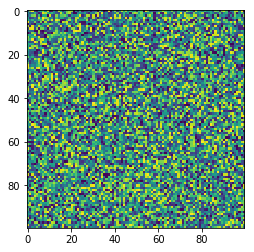

In [27]:
plt.imshow(img[0,:,:, 0])

In [15]:
blocks = intern.block_compute(0, 100, 0, 100, 0, 100, (0, 0, 0), (20, 20, 20))


In [18]:
block = blocks[0]
print(block)

((20, 40), (20, 40), (20, 40))


In [29]:
img[block]

array([[ 51, 149, 130],
       [ 31, 127,  99]])

In [30]:
img[20:40, 20:40, 20:40, :]

array([[[[ 51, 149, 130],
         [ 83, 255, 245],
         [104, 197, 177],
         ..., 
         [229,  24,  67],
         [ 29, 183, 227],
         [ 33, 110, 250]],

        [[ 96,  17, 170],
         [ 99, 114, 180],
         [242, 104, 126],
         ..., 
         [209,  75,  15],
         [230,  85, 127],
         [238,  67,  62]],

        [[213, 227, 209],
         [109, 236,  65],
         [ 28, 147,  13],
         ..., 
         [ 33, 115, 167],
         [249,  49, 140],
         [ 42,  79,  77]],

        ..., 
        [[ 33, 243, 200],
         [ 61,  60, 103],
         [235, 242,  66],
         ..., 
         [133, 245,  62],
         [197, 186, 225],
         [198, 167, 249]],

        [[  1,  90,  81],
         [124, 255, 132],
         [208, 214,  93],
         ..., 
         [  2, 155,  76],
         [199, 171, 188],
         [110, 235, 231]],

        [[227, 216,  64],
         [ 68,  10, 189],
         [ 26, 142,  12],
         ..., 
         [183,  60,  30],
  

In [33]:
z_range = block[0]
y_range = block[1]
x_range = block[2]

img_block = img[z_range[0]:z_range[1], y_range[0]:y_range[1], x_range[0]:x_range[1], :]

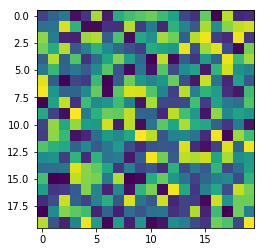

In [34]:
plt.imshow(img_block[0,:,:, 0])

In [35]:
## case where blocks bigger than data
intern.block_compute(0, 5, 0, 5, 0, 5, (0, 0, 0), (50, 50, 50))

[((0, 5), (0, 5), (0, 5))]

In [42]:
## case where unequal division, very nice!
intern.block_compute(0, 13, 0, 13, 0, 13, (0, 0, 0), (5, 5, 100))

[((5, 10), (5, 10), (0, 13)),
 ((5, 10), (0, 5), (0, 13)),
 ((5, 10), (10, 13), (0, 13)),
 ((0, 5), (5, 10), (0, 13)),
 ((0, 5), (0, 5), (0, 13)),
 ((0, 5), (10, 13), (0, 13)),
 ((10, 13), (5, 10), (0, 13)),
 ((10, 13), (0, 5), (0, 13)),
 ((10, 13), (10, 13), (0, 13))]

In [41]:
intern.block_compute(0, 13, 0, 13, 0, 13, (5, 5, 5), (5, 5, 100))
## Don't fuck with origin. Breaks something
## Easy to fix, just slice columns with numpy

[((5, 10), (5, 10), (0, 5)),
 ((5, 10), (5, 10), (5, 13)),
 ((5, 10), (0, 5), (0, 5)),
 ((5, 10), (0, 5), (5, 13)),
 ((5, 10), (10, 13), (0, 5)),
 ((5, 10), (10, 13), (5, 13)),
 ((0, 5), (5, 10), (0, 5)),
 ((0, 5), (5, 10), (5, 13)),
 ((0, 5), (0, 5), (0, 5)),
 ((0, 5), (0, 5), (5, 13)),
 ((0, 5), (10, 13), (0, 5)),
 ((0, 5), (10, 13), (5, 13)),
 ((10, 13), (5, 10), (0, 5)),
 ((10, 13), (5, 10), (5, 13)),
 ((10, 13), (0, 5), (0, 5)),
 ((10, 13), (0, 5), (5, 13)),
 ((10, 13), (10, 13), (0, 5)),
 ((10, 13), (10, 13), (5, 13))]

In [45]:
#data should be numpy array, block_size should be a tuple with 3 elements in it in order (z, y, x)
def split_data(data, block_size):
    z, y, x = data.shape[0:3]
    block_size = block_size[::-1]
    blocks = intern.block_compute(0, x, 0, z, 0, y, (0, 0, 0), block_size)
    
    img_blocks = {}
    for block in blocks:
        z_range, y_range, x_range = block
        img_block = img[z_range[0]:z_range[1], y_range[0]:y_range[1], x_range[0]:x_range[1], :]
        ## give label
        block_id = str(z_range[0]) + "_" + str(y_range[0]) + "_" + str(x_range[0])
        img_blocks[block_id] = img_block
    return img_blocks

In [46]:
img_blocks = split_data(img, (20, 20, 20))

20_20_20
(20, 20, 20, 3)


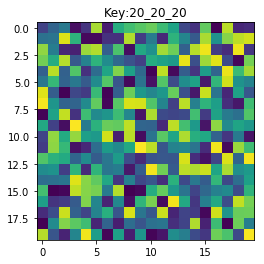

In [59]:
key = next (iter (img_blocks.keys()))
print(key)
sanity = img_blocks[key]
print(sanity.shape)
plt.title("Key:" + key)
plt.imshow(sanity[0,:,:, 0])

In [60]:
## Now the expanded one
## Everything is in image coordinates
#data should be numpy array, block_size should be a tuple with 3 elements in it in order (z, y, x)
## padding is also a tuple (x, y, z)
def split_data_padded(data, block_size, padding):
    z, y, x = data.shape[0:3]
    block_size = block_size[::-1]
    blocks = intern.block_compute(0, x, 0, z, 0, y, (0, 0, 0), block_size)
    
    img_blocks = {}
    for block in blocks:
        z_range, y_range, x_range = block
        ## annoying code to add padding, oh wellz
        z_start, z_end = z_range
        x_start, x_end = x_range
        y_start, y_end = y_range
        
        if z_start - padding[0] >= 0:
            z_start -= padding[0]
        if z_end + padding[0] < z:
            z_end += padding[0]
            
        if x_start - padding[2] >= 0:
            x_start -= padding[2]
        if x_end + padding[2] < x:
            x_end += padding[2]
            
        if y_start - padding[1] >= 0:
            y_start -= padding[1]
        if y_end + padding[1] < y:
            y_end += padding[1]

        
        img_block = img[z_start:z_end, y_start:y_end, x_start:x_end, :]
        ## give label
        block_id = str(z_start) + "_" + str(y_start) + "_" + str(x_start)
        img_blocks[block_id] = img_block
    return img_blocks

In [100]:
img_blocks_padded = split_data_padded(img, (20, 20, 20), (5, 5, 5))
print(img_blocks_padded.keys())

dict_keys(['15_15_15', '15_15_35', '15_15_55', '15_15_0', '15_15_75', '15_35_15', '15_35_35', '15_35_55', '15_35_0', '15_35_75', '15_55_15', '15_55_35', '15_55_55', '15_55_0', '15_55_75', '15_0_15', '15_0_35', '15_0_55', '15_0_0', '15_0_75', '15_75_15', '15_75_35', '15_75_55', '15_75_0', '15_75_75', '35_15_15', '35_15_35', '35_15_55', '35_15_0', '35_15_75', '35_35_15', '35_35_35', '35_35_55', '35_35_0', '35_35_75', '35_55_15', '35_55_35', '35_55_55', '35_55_0', '35_55_75', '35_0_15', '35_0_35', '35_0_55', '35_0_0', '35_0_75', '35_75_15', '35_75_35', '35_75_55', '35_75_0', '35_75_75', '55_15_15', '55_15_35', '55_15_55', '55_15_0', '55_15_75', '55_35_15', '55_35_35', '55_35_55', '55_35_0', '55_35_75', '55_55_15', '55_55_35', '55_55_55', '55_55_0', '55_55_75', '55_0_15', '55_0_35', '55_0_55', '55_0_0', '55_0_75', '55_75_15', '55_75_35', '55_75_55', '55_75_0', '55_75_75', '0_15_15', '0_15_35', '0_15_55', '0_15_0', '0_15_75', '0_35_15', '0_35_35', '0_35_55', '0_35_0', '0_35_75', '0_55_15', 

In [99]:
##non padded merge
## This function will separate blocks by x, y, and z components
class Block:
    def __init__(self, key, img_block):
        coords = key.split("_")
        self.z_start = int(coords[0])
        self.y_start = int(coords[1])
        self.x_start = int(coords[2])
        
        z, y, x, c = img_block.shape
        
        self.z_end = self.z_start + z
        self.y_end = self.y_start + y
        self.x_end = self.x_start + x
        
        self.key = key
        self.data = img_block

block_list = []
for key, value in img_blocks.items():
    block_list.append(Block(key, value))
print(block_list[0].x_start)

20


In [76]:
shape = img.shape
print(shape)

(100, 100, 100, 3)


In [79]:
merged_array = np.zeros(shape)
print(merged_array.shape)

(100, 100, 100, 3)


In [82]:
for block in block_list:
    merged_array[block.z_start:block.z_end, block.y_start:block.y_end, block.x_start:block.x_end, :] = block.data

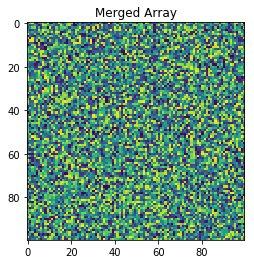

In [83]:
plt.title("Merged Array")
plt.imshow(merged_array[0,:,:, 0])

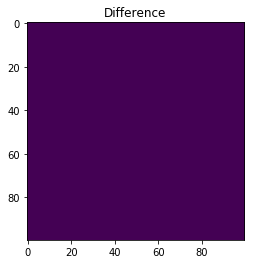

In [85]:
## ULTIMATE TEST:
diff = np.subtract(merged_array, img)
plt.title("Difference")
plt.imshow(diff[0,:,:, 0])

In [86]:
def merge(img_blocks, orig_shape):
    block_list = []
    for key, value in img_blocks.items():
        block_list.append(Block(key, value))
    merged_array = np.zeros(orig_shape)
    for block in block_list:
        merged_array[block.z_start:block.z_end, block.y_start:block.y_end, block.x_start:block.x_end, :] = block.data
    return merged_array

In [101]:
merged_array_padded = merge(img_blocks_padded, img.shape)

In [102]:
diff = np.subtract(img, merged_array_padded)
print(np.where(diff > 0))


(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
